In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data
import yfinance as yf


In [3]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())  


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440330  6.455075  6.391277  6.422875  493729600
2010-01-05  6.451466  6.487879  6.417460  6.458087  601904800
2010-01-06  6.348848  6.477047  6.342227  6.451467  552160000
2010-01-07  6.337107  6.379841  6.291064  6.372317  477131200
2010-01-08  6.379241  6.379844  6.291369  6.328684  447610800


In [5]:
print(df.tail())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2019-12-23  68.757652  68.818178  67.878812  67.917550   98572000
2019-12-24  68.823006  68.973117  68.496171  68.924693   48478800
2019-12-26  70.188507  70.205456  68.927145  68.956196   93121200
2019-12-27  70.161858  71.171436  69.755124  70.481437  146266000
2019-12-30  70.578278  70.861543  69.053023  70.079543  144114400


In [7]:
df = df.reset_index()
print(df.head())


Price        Date     Close      High       Low      Open     Volume
Ticker                 AAPL      AAPL      AAPL      AAPL       AAPL
0      2010-01-04  6.440330  6.455075  6.391277  6.422875  493729600
1      2010-01-05  6.451466  6.487879  6.417460  6.458087  601904800
2      2010-01-06  6.348848  6.477047  6.342227  6.451467  552160000
3      2010-01-07  6.337107  6.379841  6.291064  6.372317  477131200
4      2010-01-08  6.379241  6.379844  6.291369  6.328684  447610800


In [9]:
# Drop the 'Date' and 'Volume' columns
df = df.drop([('Date', ''), ('Volume', 'AAPL')], axis=1)

# Display the updated DataFrame
print(df.head())


Price      Close      High       Low      Open
Ticker      AAPL      AAPL      AAPL      AAPL
0       6.440330  6.455075  6.391277  6.422875
1       6.451466  6.487879  6.417460  6.458087
2       6.348848  6.477047  6.342227  6.451467
3       6.337107  6.379841  6.291064  6.372317
4       6.379241  6.379844  6.291369  6.328684


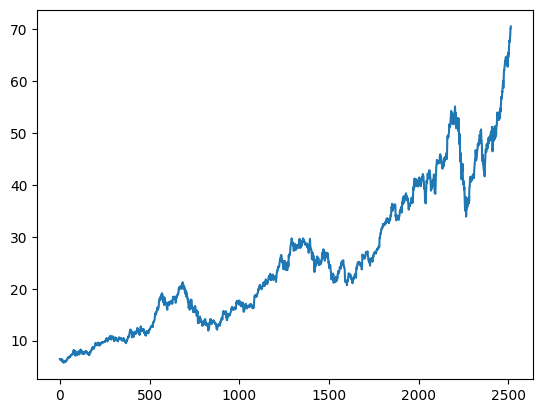

In [11]:
plt.plot(df.Close)

In [13]:
df

Price,Close,High,Low,Open
Ticker,AAPL,AAPL,AAPL,AAPL
0,6.440330,6.455075,6.391277,6.422875
1,6.451466,6.487879,6.417460,6.458087
2,6.348848,6.477047,6.342227,6.451467
3,6.337107,6.379841,6.291064,6.372317
4,6.379241,6.379844,6.291369,6.328684
...,...,...,...,...
2510,68.757652,68.818178,67.878812,67.917550
2511,68.823006,68.973117,68.496171,68.924693
2512,70.188507,70.205456,68.927145,68.956196


In [15]:
ma100 = df.Close.rolling(100).mean()
ma100


Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.212837
2511,57.410468
2512,57.647436
2513,57.875336


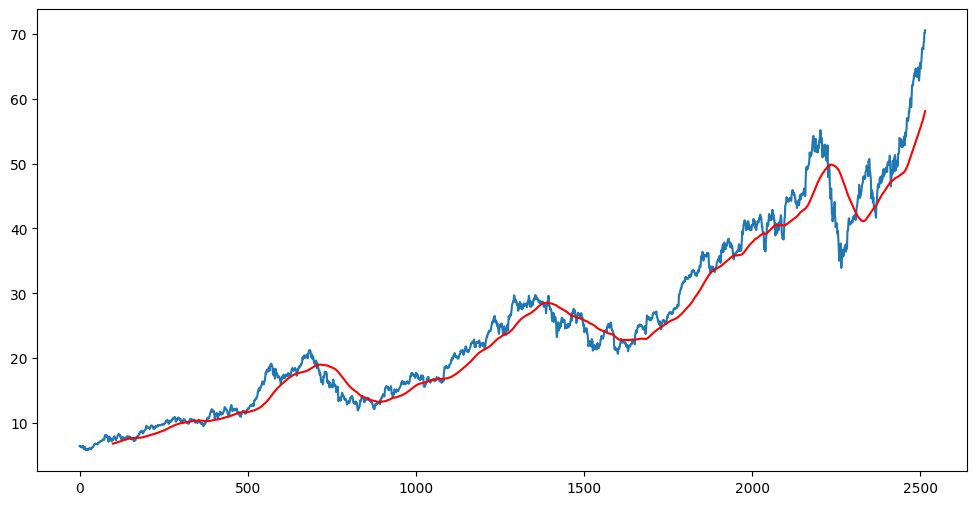

In [17]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [19]:
ma200 = df.Close.rolling(200).mean()
ma200


Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.164464
2511,52.291900
2512,52.425205
2513,52.555957


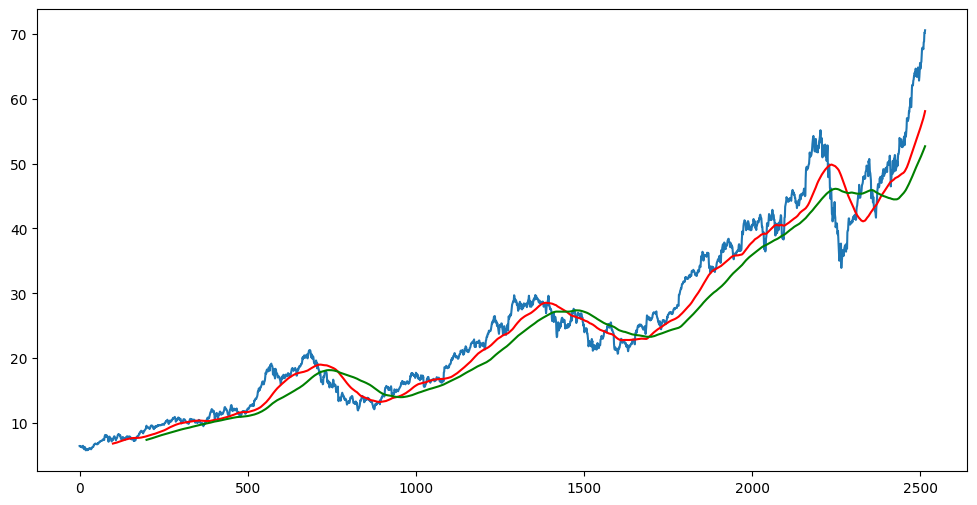

In [21]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [23]:
df.shape

(2515, 4)

In [25]:
#Spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape) 



(1760, 1)
(755, 1)


In [27]:
data_training.head()

Ticker,AAPL
0,6.440330
1,6.451466
2,6.348848
3,6.337107
4,6.379241


In [29]:
data_testing.head()

Ticker,AAPL
1760,26.996567
1761,26.786108
1762,26.862431
1763,26.832361
1764,26.968819


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [37]:
data_training_array= scaler.fit_transform(data_training)
data_training_array





array([[0.02759992],
       [0.02806503],
       [0.02377927],
       ...,
       [0.88408394],
       [0.89123155],
       [0.88640232]])

In [39]:
print(data_training_array.shape)

(1760, 1)


In [43]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train= np.array(x_train), np.array(y_train)

In [45]:
print(x_train.shape)

(1660, 100, 1)


In [49]:
#Ml Model




In [53]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

# Define the model
model = Sequential()

# Add the Input layer (first layer specifying the shape of the input)
model.add(Input(shape=(x_train.shape[1], 1)))

# Add the first LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Add the second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add the third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add the fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(units=1))


In [55]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [57]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs =50)   


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.1398
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0123
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0091
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0093
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0100
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0102
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0076
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0072
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0075
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0069
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 0.0069
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0069
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0056
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0062
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0063


In [59]:
# Save the trained model 
model.save('keras_model.keras')


In [61]:
data_testing.head()

Ticker,AAPL
1760,26.996567
1761,26.786108
1762,26.862431
1763,26.832361
1764,26.968819


In [63]:
data_training.tail(100)

Ticker,AAPL
1660,24.935093
1661,25.036337
1662,24.849962
1663,24.833860
1664,24.891378
...,...
1755,27.072887
1756,26.894800
1757,26.947992
1758,27.119135


In [67]:
past_100_days = data_training.tail(100)

In [71]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [73]:
final_df.head()

Ticker,AAPL
0,24.935093
1,25.036337
2,24.849962
3,24.833860
4,24.891378


In [77]:
input_data = scaler.fit_transform(final_df)
print(input_data)

[[0.02573554]
 [0.02789662]
 [0.02391841]
 [0.02357471]
 [0.02480244]
 [0.03118723]
 [0.03069599]
 [0.02991031]
 [0.02922271]
 [0.03059779]
 [0.02642318]
 [0.02809297]
 [0.02406566]
 [0.02180643]
 [0.01871238]
 [0.01812286]
 [0.01409567]
 [0.01458671]
 [0.01768104]
 [0.02259243]
 [0.02244501]
 [0.02568636]
 [0.01173815]
 [0.        ]
 [0.01134536]
 [0.02367287]
 [0.04243418]
 [0.0610975 ]
 [0.05790517]
 [0.05132386]
 [0.05127476]
 [0.05117652]
 [0.05643169]
 [0.04705093]
 [0.04788603]
 [0.04891729]
 [0.05314108]
 [0.044448  ]
 [0.04872085]
 [0.04611767]
 [0.04847523]
 [0.04872085]
 [0.05284628]
 [0.0536813 ]
 [0.06345493]
 [0.06468283]
 [0.06979054]
 [0.0680225 ]
 [0.07121488]
 [0.07082196]
 [0.07042908]
 [0.06871014]
 [0.06841542]
 [0.06615623]
 [0.07131312]
 [0.07425995]
 [0.06119566]
 [0.05574417]
 [0.0520115 ]
 [0.05112742]
 [0.04105919]
 [0.04155018]
 [0.03567557]
 [0.03078841]
 [0.03853886]
 [0.0417476 ]
 [0.04085908]
 [0.02560493]
 [0.02876437]
 [0.01533692]
 [0.02224804]
 [0.03

In [79]:
input_data.shape

(855, 1)

In [81]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [83]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [85]:
#Marking prediction

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


In [87]:
y_predicted.shape

(755, 1)

In [89]:
y_test

array([0.06973818, 0.06524589, 0.06687501, 0.06623318, 0.06914589,
       0.07556337, 0.08089475, 0.0814872 , 0.08464672, 0.0821783 ,
       0.08114167, 0.08588089, 0.0858315 , 0.08479467, 0.08588089,
       0.08627572, 0.08573269, 0.09516145, 0.09545776, 0.09550711,
       0.09392733, 0.09254513, 0.12907591, 0.12798986, 0.13070499,
       0.13667842, 0.14279967, 0.14531735, 0.15002725, 0.14854009,
       0.15434085, 0.16291827, 0.16534744, 0.16455439, 0.16638858,
       0.17124754, 0.17328057, 0.17040466, 0.1710493 , 0.1723879 ,
       0.17268567, 0.18656789, 0.18245288, 0.18651805, 0.18433642,
       0.18522933, 0.18265115, 0.18106449, 0.18334522, 0.18364259,
       0.1826014 , 0.18988964, 0.19103001, 0.18755924, 0.19484773,
       0.18681566, 0.19464938, 0.19217037, 0.19078199, 0.19197218,
       0.20644917, 0.20803599, 0.20709398, 0.2057555 , 0.20595353,
       0.21125882, 0.20754003, 0.2057555 , 0.20416868, 0.20332568,
       0.19569065, 0.19653308, 0.1928147 , 0.196682  , 0.19355

In [91]:
y_predicted

array([[0.11586188],
       [0.11609116],
       [0.11632703],
       [0.11656171],
       [0.11678895],
       [0.11700471],
       [0.11721037],
       [0.11741389],
       [0.11762623],
       [0.11785845],
       [0.11811875],
       [0.11840951],
       [0.11873187],
       [0.11908735],
       [0.11947438],
       [0.11988935],
       [0.12032813],
       [0.1207805 ],
       [0.12124789],
       [0.12173791],
       [0.12225644],
       [0.12280554],
       [0.12338151],
       [0.12400571],
       [0.12472214],
       [0.12556924],
       [0.12657887],
       [0.12777756],
       [0.12918316],
       [0.13080564],
       [0.1326426 ],
       [0.13468315],
       [0.1369188 ],
       [0.13934009],
       [0.1419292 ],
       [0.14466262],
       [0.14751731],
       [0.15046942],
       [0.15348813],
       [0.15653798],
       [0.15958507],
       [0.1625973 ],
       [0.1655623 ],
       [0.16847254],
       [0.1713243 ],
       [0.17411125],
       [0.17680162],
       [0.179

In [93]:
scaler.scale_

array([0.02134523])

In [95]:
scale_factor = 1/0.02134523
y_predicted = y_predicted * scale_factor
y_test = y_test* scale_factor

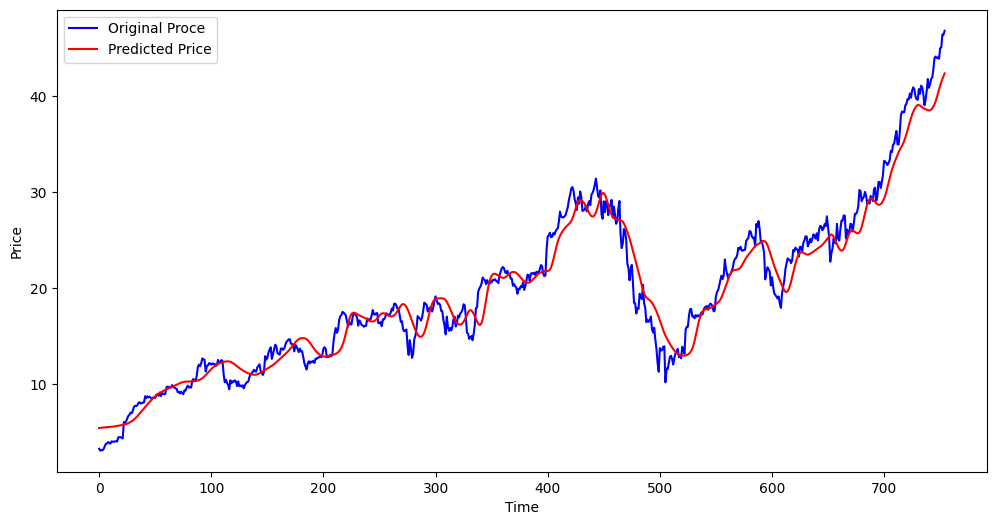

In [101]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Proce')
plt.plot(y_predicted, 'r' , label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()